# 2. 傳統機器學習模型訓練

## 建構與訓練傳統機器學習模型
	•	分別訓練三個強大的機器學習模型 RF、XGBoost、LightGBM
	•	用三個模型（RF、XGBoost、LightGBM）做「集成學習（Ensemble Learning）」，並用 VotingClassifier 組合成一個更穩定、準確的分類器。

In [119]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

In [120]:
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
lgbm = lgb.LGBMClassifier(class_weight="balanced", random_state=42)

# VotingClassifier 集成模型
voting = VotingClassifier(estimators=[
    ('rf', rf), ('xgb', xgb), ('lgbm', lgbm)
], voting='soft')

models = {
    "RandomForest": rf,
    "XGBoost": xgb,
    "LightGBM": lgbm,
    "VotingEnsemble": voting
}

reports = {}
aucs = {}
predictions = {}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test_reduced)
    predictions[name] = y_pred
    report = classification_report(y_test_enc, y_pred, output_dict=True)
    reports[name] = report
    auc = roc_auc_score(y_test_enc, model.predict_proba(X_test_reduced), multi_class='ovr')
    aucs[name] = auc

report_df = pd.DataFrame({name: reports[name]['weighted avg'] for name in models}).T
report_df['AUC'] = pd.Series(aucs)
report_df


/Users/ching/.pyenv/versions/3.10.13/envs/cv-auto-label-env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:34:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4904
[LightGBM] [Info] Number of data points in the train set: 3113, number of used features: 21
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

/Users/ching/.pyenv/versions/3.10.13/envs/cv-auto-label-env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:34:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4904
[LightGBM] [Info] Number of data points in the train set: 3113, number of used features: 21
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

,precision,recall,f1-score,support,AUC
RandomForest,0.783575,0.735219,0.731873,389.0,0.951326
XGBoost,0.770331,0.724936,0.724298,389.0,0.948048
LightGBM,0.797874,0.748072,0.746696,389.0,0.952266
VotingEnsemble,0.794786,0.745501,0.743961,389.0,0.952941


,precision,recall,f1-score,support,AUC
RandomForest,0.783575,0.735219,0.731873,389.0,0.951326
XGBoost,0.770331,0.724936,0.724298,389.0,0.948048
LightGBM,0.797874,0.748072,0.746696,389.0,0.952266
VotingEnsemble,0.794786,0.745501,0.743961,389.0,0.952941



📘 Model: RandomForest
              precision    recall  f1-score   support

       Bumps       0.65      0.79      0.71        81
   Dirtiness       0.62      0.91      0.74        11
    K_Scatch       0.99      0.95      0.97        78
Other_Faults       0.84      0.47      0.60       135
      Pastry       0.43      0.88      0.58        32
      Stains       0.80      0.86      0.83        14
   Z_Scratch       0.80      0.92      0.85        38

    accuracy                           0.74       389
   macro avg       0.73      0.82      0.75       389
weighted avg       0.78      0.74      0.73       389



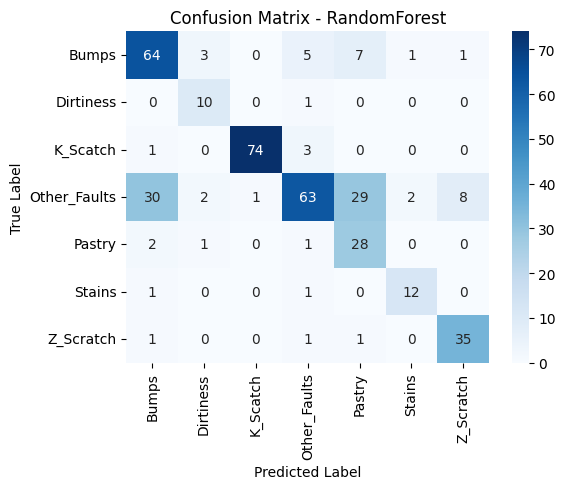


📘 Model: XGBoost
              precision    recall  f1-score   support

       Bumps       0.59      0.74      0.66        81
   Dirtiness       0.62      0.91      0.74        11
    K_Scatch       0.99      0.94      0.96        78
Other_Faults       0.82      0.48      0.61       135
      Pastry       0.43      0.81      0.57        32
      Stains       0.71      0.86      0.77        14
   Z_Scratch       0.88      0.95      0.91        38

    accuracy                           0.72       389
   macro avg       0.72      0.81      0.75       389
weighted avg       0.77      0.72      0.72       389



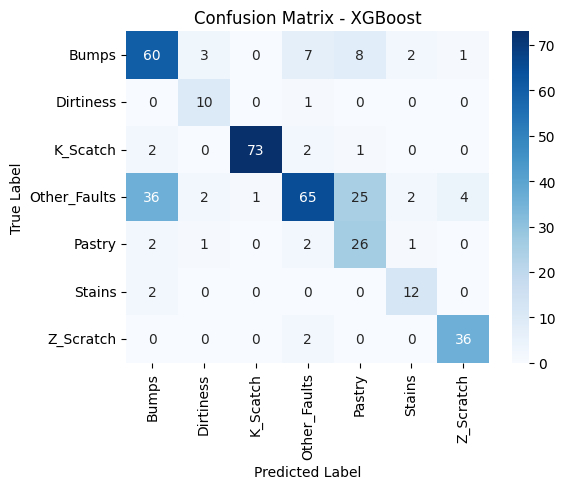


📘 Model: LightGBM
              precision    recall  f1-score   support

       Bumps       0.62      0.77      0.69        81
   Dirtiness       0.65      1.00      0.79        11
    K_Scatch       0.99      0.95      0.97        78
Other_Faults       0.88      0.50      0.64       135
      Pastry       0.45      0.84      0.59        32
      Stains       0.75      0.86      0.80        14
   Z_Scratch       0.84      0.97      0.90        38

    accuracy                           0.75       389
   macro avg       0.74      0.84      0.77       389
weighted avg       0.80      0.75      0.75       389



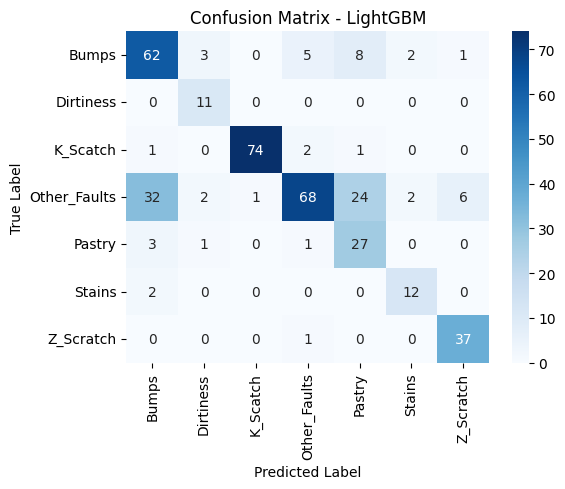


📘 Model: VotingEnsemble
              precision    recall  f1-score   support

       Bumps       0.62      0.77      0.69        81
   Dirtiness       0.62      0.91      0.74        11
    K_Scatch       0.99      0.95      0.97        78
Other_Faults       0.87      0.50      0.63       135
      Pastry       0.45      0.88      0.60        32
      Stains       0.75      0.86      0.80        14
   Z_Scratch       0.86      0.97      0.91        38

    accuracy                           0.75       389
   macro avg       0.74      0.83      0.76       389
weighted avg       0.79      0.75      0.74       389



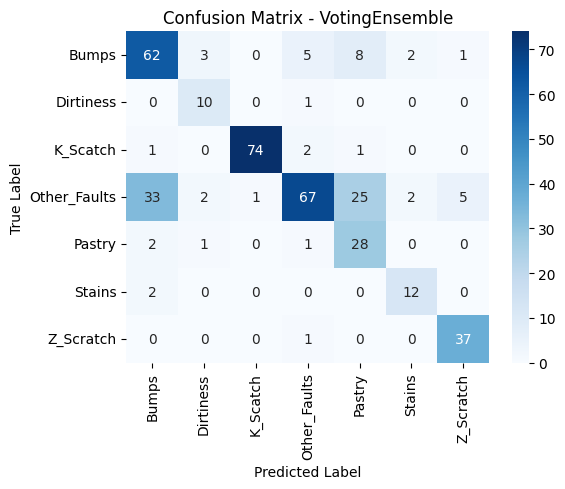

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 彙總報告表格
report_df = pd.DataFrame({name: reports[name]['weighted avg'] for name in models}).T
report_df['AUC'] = pd.Series(aucs)
display(report_df)

# ✅ 顯示每個模型的報告與混淆矩陣
for name in models:
    print(f"\n📘 Model: {name}")
    print(classification_report(y_test_enc, predictions[name], target_names=le.classes_))

    cm = confusion_matrix(y_test_enc, predictions[name])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

## 自動選出最佳模型

In [121]:

# AUC > 0.85 中挑 recall 最好的
report_df_filtered = report_df[report_df["AUC"] > 0.85]
best_model_name = report_df_filtered["recall"].idxmax()
print("最佳模型為：", best_model_name)
best_model = models[best_model_name]
best_pred = predictions[best_model_name]



最佳模型為： LightGBM
